Activation Function: relu
Hidden Layers: 2
Neurons in Each Hidden Layer: (10, 9)
Solver: sgd
Iterations: 447
Training Set Size: 224
Test Set Size: 56

Mean Squared Error(MSE): 0.024385258615032143

Root Mean Squared Error(RMSE): 0.15615780036563062

R-squared (R^2): 0.9999398128469238

Cross-validation Scores: [0.99790375 0.99925043 0.99978495 0.9995922  0.99907539]
Mean Cross-validation Score: 0.9991213435477915

Weights:

Layer 1 Weights:

Neuron 1 Weights:
[ 0.14403997  0.34738691 -0.08731944 -0.10904549 -0.11821392 -0.24959959
 -0.5135795   0.23707341  0.15633247  0.17952824]

Neuron 2 Weights:
[-0.63574695  0.16331058  0.05152209 -0.5803151   0.04157175 -0.39899021
  0.1761594   0.00903932  0.15376034 -0.02484392]

Neuron 3 Weights:
[ 0.86890744  0.24531228 -0.08492719  1.92764367  0.42743945  0.52946518
  0.03728119  2.28930524  0.64477246 -0.63373686]

Neuron 4 Weights:
[-0.30516946 -0.14018654 -0.29611702  0.23369287  0.10405051  0.07284436
 -0.07395083  0.02591893  0.02091365 

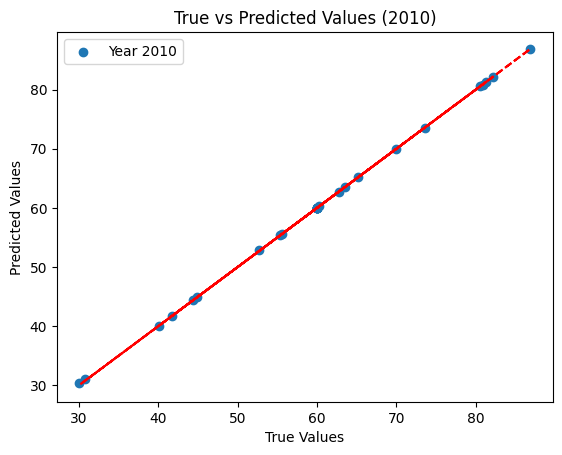

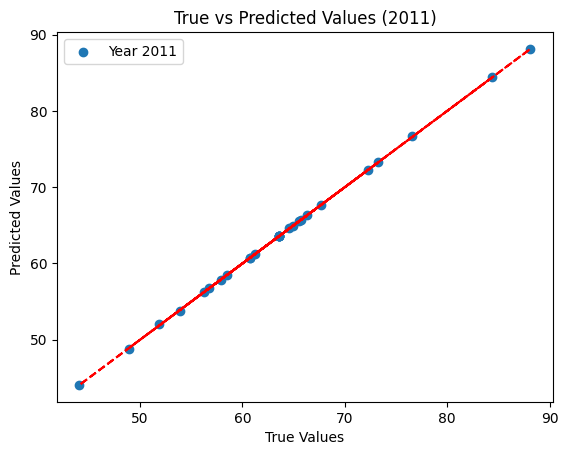

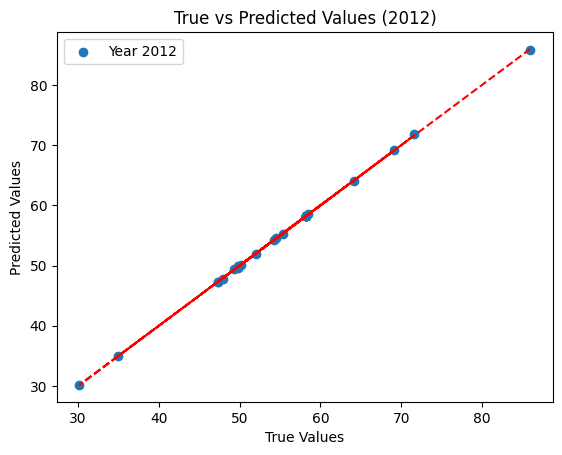

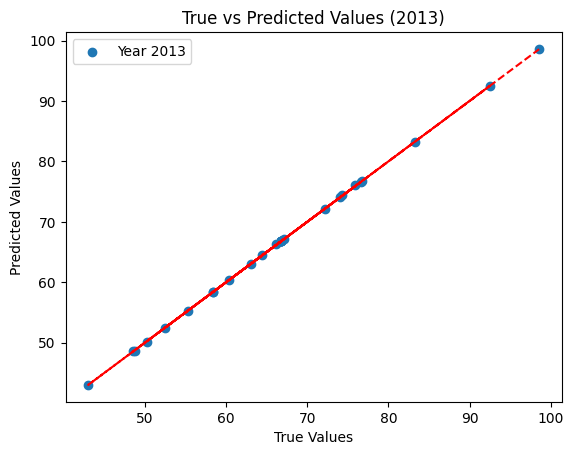

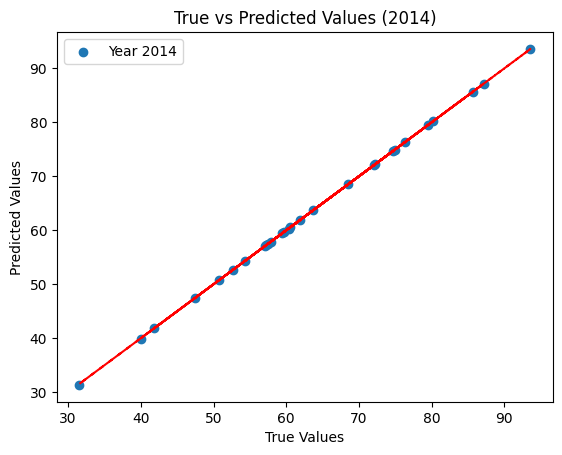

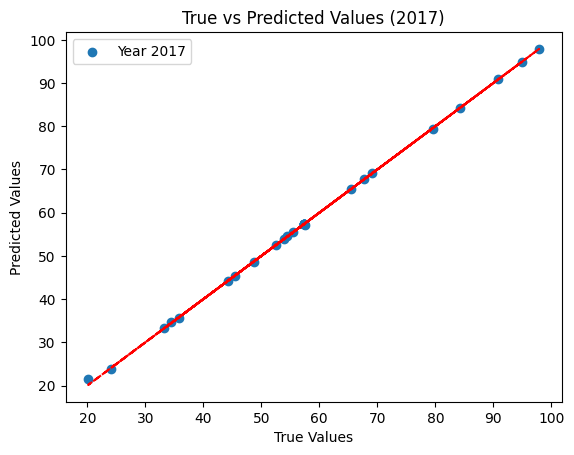

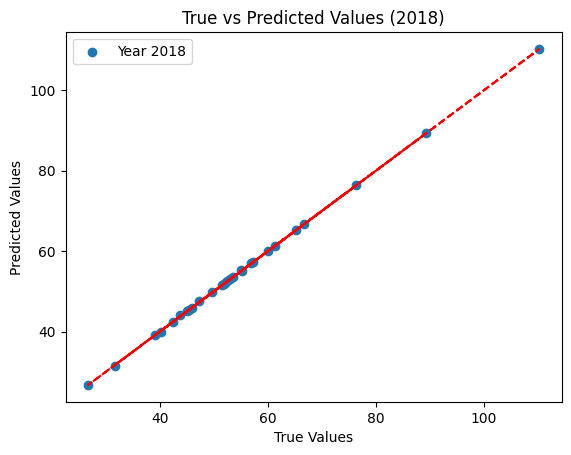

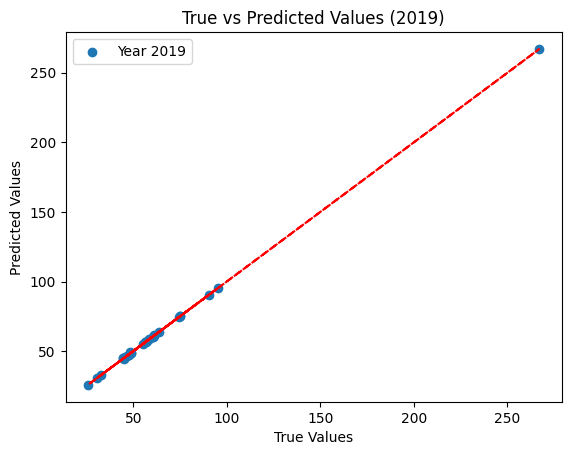

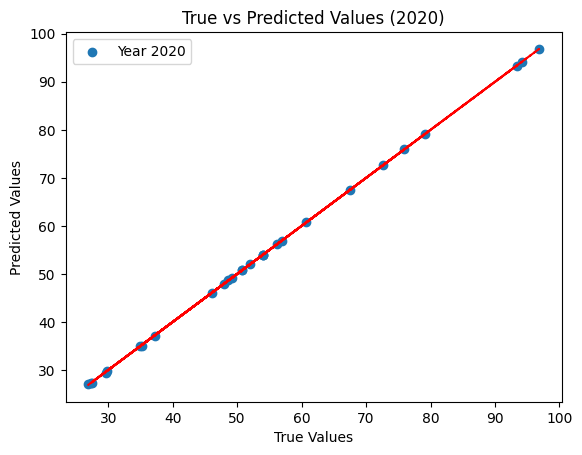

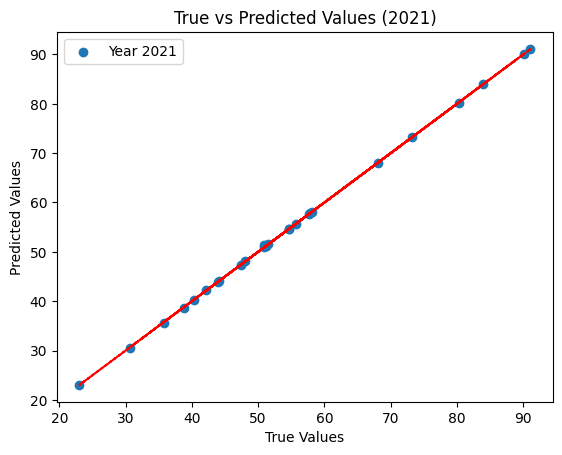

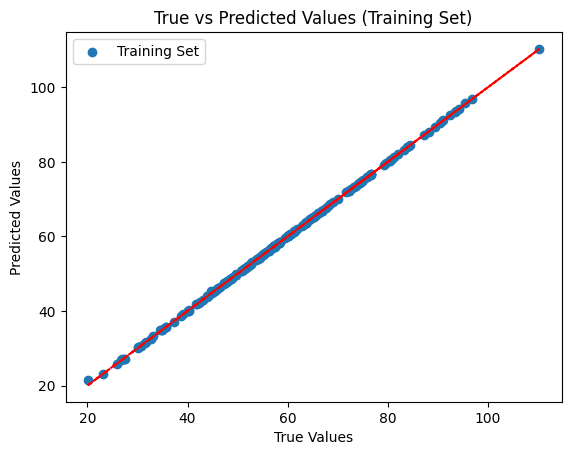

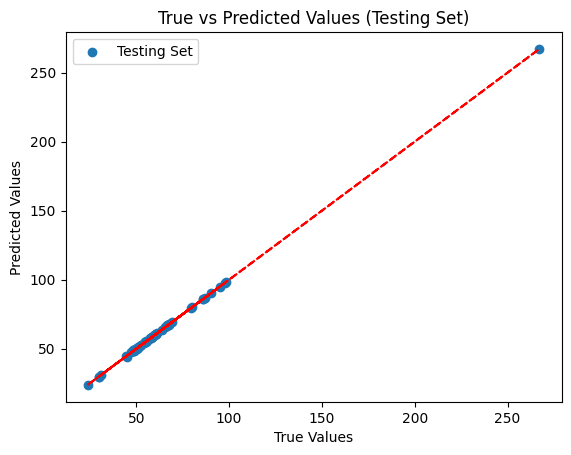

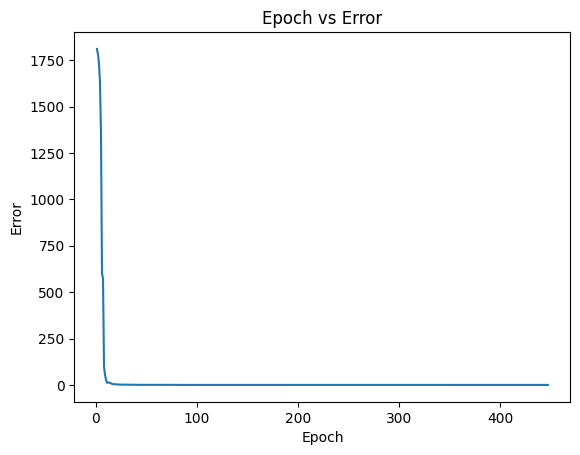

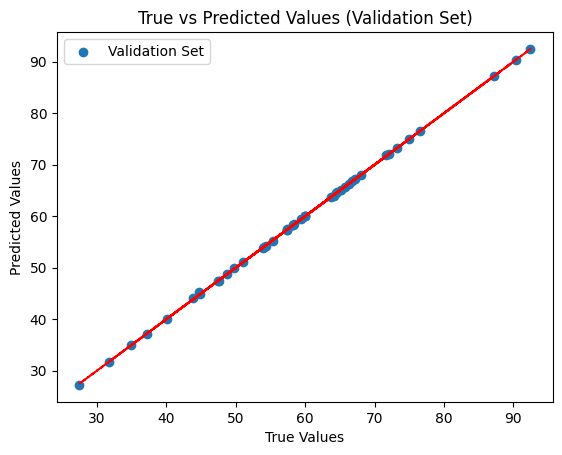

In [ ]:

# Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset
data = pd.read_excel('MERGEDdATA.xlsx')

# Separating features and target variable
X = data[['PH', 'NITRATE ', 'FLOURIDE', 'SULPHATE', 'CALCIUM', 'MAGNESIUM', 'HARDNESS', 'CLORIDE', 'TDS', 'ALKALINITY']]
y = data["WQI"]

# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating MLP Regressor model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(10,9), activation='relu', solver='sgd', max_iter=1000, random_state=42)

# Training the model
mlp_regressor.fit(X_train, y_train)

# Printing model information and evaluation metrics
print("Activation Function:", mlp_regressor.activation)
print("Hidden Layers:", mlp_regressor.n_layers_ - 2)
print("Neurons in Each Hidden Layer:", mlp_regressor.hidden_layer_sizes)
print("Solver:", mlp_regressor.solver)
print("Iterations:", mlp_regressor.n_iter_)
print("Training Set Size:", len(X_train))
print("Test Set Size:", len(X_test))

# Predicting values and calculating evaluation metrics
predicted_values = mlp_regressor.predict(X)
mse = mean_squared_error(y, predicted_values)
rmse = mean_squared_error(y, predicted_values, squared=False)
r2 = r2_score(y, predicted_values)
print('\nMean Squared Error(MSE):', mse)
print('\nRoot Mean Squared Error(RMSE):', rmse)
print('\nR-squared (R^2):', r2)

# Cross-validation
cv_scores = cross_val_score(mlp_regressor, X_train, y_train, cv=5)
print("\nCross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())

# Printing weights of the model
print("\nWeights:")
for i, weights in enumerate(mlp_regressor.coefs_):
    print("\nLayer", i+1, "Weights:")
    for j, neuron_weights in enumerate(weights):
        weights_array = np.array(neuron_weights)
        print("\nNeuron", j+1, "Weights:")
        print(weights_array)

# Displaying true and predicted values for the entire dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
true_predicted_df = pd.DataFrame({'True': y.round(1), 'Predicted': predicted_values.round(1)})
print("\nTrue and Predicted Values for the Entire Dataset:")
print(true_predicted_df)

# Visualizing true vs predicted values for each year
years = [2010, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020, 2021]
for year in years:
    plt.figure()
    plt.title(f'True vs Predicted Values ({year})')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    start_idx = (years.index(year)) * 28
    end_idx = start_idx + 28
    plt.scatter(y[start_idx:end_idx], predicted_values[start_idx:end_idx], label=f'Year {year}')
    plt.plot(y[start_idx:end_idx], y[start_idx:end_idx], color='red', linestyle='--')
    plt.legend()
    plt.show()

# Visualizing true vs predicted values for the training set
plt.figure()
plt.title('True vs Predicted Values (Training Set)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.scatter(y_train, mlp_regressor.predict(X_train), label='Training Set')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.legend()
plt.show()

# Visualizing true vs predicted values for the testing set
plt.figure()
plt.title('True vs Predicted Values (Testing Set)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test, mlp_regressor.predict(X_test), label='Testing Set')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.legend()
plt.show()

# Visualizing epoch vs error
plt.figure()
plt.title('Epoch vs Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(range(1, mlp_regressor.n_iter_ + 1), mlp_regressor.loss_curve_, linestyle='-')
plt.show()

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Visualizing true vs predicted values for the validation set
plt.figure()
plt.title('True vs Predicted Values (Validation Set)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
predicted_val = mlp_regressor.predict(X_val)
plt.scatter(y_val, predicted_val, label='Validation Set')
plt.plot(y_val, y_val, color='red', linestyle='--')
plt.legend()
plt.show()